# Medidas de desempeño

### En esta Clase vamos a repasar, de manera práctica, los conceptos de medidas de desempeño

#### Tiempos de ejecución
Es la métrica más sencilla, solo tenemos que calcular el tiempo desde que empieza a correr el programa hasta que termina.

In [ ]:
import time

def funcion(tiempo: int):
  time.sleep(tiempo)


inicio = time.time()
funcion(10)
fin = time.time()

print(f"El tiempo de ejecución del código es de {fin- inicio}")
# Podemos notar que el tiempo de ejecución es diferente a los que podríamos suponer.
# Aunque la funcion se va a dormir por 10 segundos, el programa tarda un tiempo más en enviar las instrucciones a la ALU para hacer el proceso.

El tiempo de ejecución del código es de 10.00997519493103


#### Aceleración

Esta métrica mide la rapidéz con la que se ejecuta un algoritmo paralelo respecto a como se haría en  (1 procesador).

Si tenemos un algoritmo que emplea 60 segundos en completar su ejecución con un solo procesador, cuanto es la aceleración del algoritmo si con 4 procesadores la realiza en 20 segundos.

In [ ]:
t_1 = 60
t_4 = 20

Aceleracion = 60/20
print(f" La aceleración es de {Aceleracion} veces")
#La aceleración de un algoritmo es adimensional

 La aceleración es de 3.0 veces


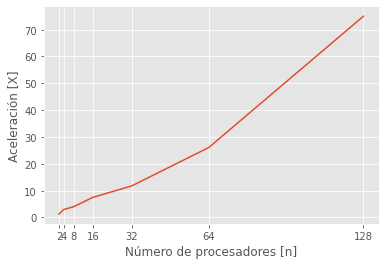

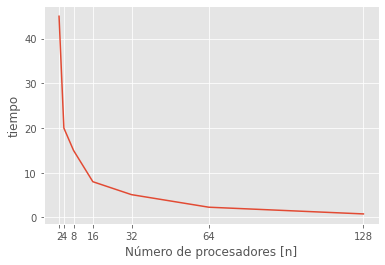

In [ ]:
# Si tenemos los tiempos del algoritmo, ejecutado con diferentes procesadores
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

n_cores = np.array([2,4,8,16,32,64,128])
t_paralelo = np.array([45,20,15,8,5.11,2.3,0.8])

# Miremos gráficamente el comportamiento.

acel = t_1 / t_paralelo
plt.plot(n_cores, acel)
plt.xticks(n_cores);
plt.ylabel("Aceleración [X]");
plt.xlabel("Número de procesadores [n]");

plt.figure()
plt.plot(n_cores, t_paralelo)
plt.xticks(n_cores);
plt.ylabel("tiempo");
plt.xlabel("Número de procesadores [n]");


### Eficiencia

Supongamos que tenemos un problema que se puede resolver en 100 segundos con un algoritmo secuencial. Queremos resolver el mismo problema utilizando un algoritmo paralelo en una computadora con 4 procesadores. Ejecutamos el algoritmo paralelo y medimos que tarda 25 segundos en completar.

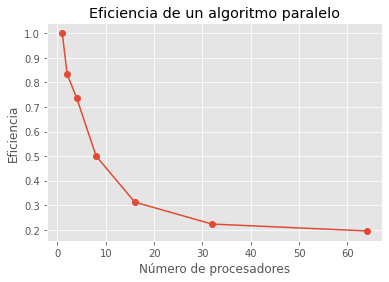

In [ ]:
import numpy as np

t_secuencial = 100
t_para = [100,60,34,25,20,14,8]

proc = np.array([1,2,4,8,16,32,64])

eficiencia = t_secuencial /(proc * t_para) ## Esta se deduce de la ecn de aceleración y eficiencia.


plt.plot(proc,eficiencia,'-o')
plt.xlabel('Número de procesadores')
plt.ylabel('Eficiencia')
plt.title('Eficiencia de un algoritmo paralelo')
plt.show()

### Ley de Amdahl

supongamos que tenemos un programa secuencial que tarda 1 hora en completarse, y que podemos paralelizar el 50% del código. Es decir, la mitad del programa se puede ejecutar en paralelo, mientras que la otra mitad sigue siendo secuencial. Si tenemos 8 procesadores disponibles para ejecutar el programa en paralelo, ¿cuál sería el tiempo de ejecución?

Para responder a esta pregunta, podemos utilizar la Ley de Amdahl y la siguiente fórmula:

\begin{align}{
  {\huge Acel = \frac{1}{f_s + (\frac{f_p}{N})}}
  }\end{align}

* Acá $f_s$ es la fracción secuencial
* Acá $f_p$ es la fracción paralela
* Acá $N$ es la cantidad de procesadores


In [ ]:
N = 8
frac_ser = 0.5
frac_par = 1 - frac_ser

acel = 1/(frac_ser +(frac_par/N))
acel

1.7777777777777777

In [ ]:
#s=ts/tp;
#tp=ts/s
tp=60/1.7777
tp

33.751476627102434

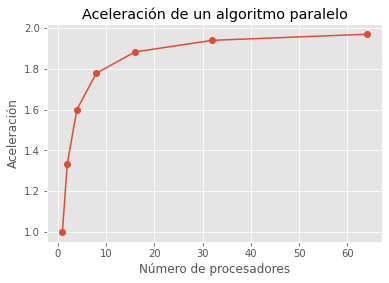

In [ ]:
## Ahora miremos el desempeño del algoritmo variando el número de procesadores
import numpy as np

N = np.array([1,2,4,8,16,32,64])
frac_ser = 0.5
frac_par = 1 - frac_ser


acel = 1/(frac_ser +(frac_par/N))

plt.plot(N,acel,'-o')
plt.xlabel('Número de procesadores')
plt.ylabel('Aceleración')
plt.title('Aceleración de un algoritmo paralelo')
plt.show()

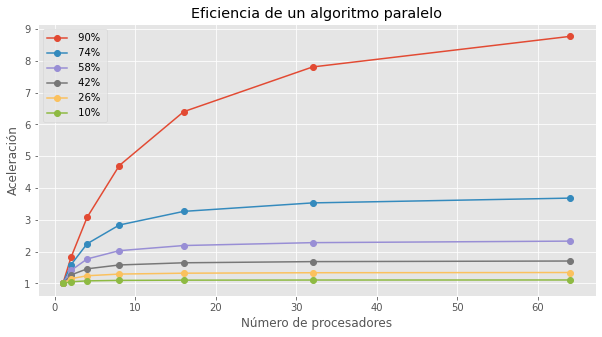

In [ ]:
# Miremos ahora si también se modifica el porcentaje de paralelización

N = np.array([1,2,4,8,16,32,64])
frac_sers = np.linspace(0.1, 0.9, 6)

plt.figure(figsize=(10,5))
for frac_ser in frac_sers:
  frac_par = 1 - frac_ser
  acel = 1/(frac_ser +(frac_par/N))
  plt.plot(N,acel,'-o',label=' {:.0f}% '.format(frac_par*100))

plt.xlabel('Número de procesadores')
plt.ylabel('Aceleración')
plt.title('Eficiencia de un algoritmo paralelo')
plt.legend()
plt.show()

### Ley de Gustafson

Establece que cualquier problema suficientemente grande puede ser eficientemente paralelizado, ofrece un nuevo punto de vista y así una visión positiva de las ventajas del procesamiento paralelo.
La ecuación $s$ se define de la siguiente manera:

$$
s = f + N(1 - f) = N - fx(N - 1)
$$

Donde:
- $f$ es el porcentaje en decimales de la parte secuencial.
- $N$ es la cantidad de procesadores.


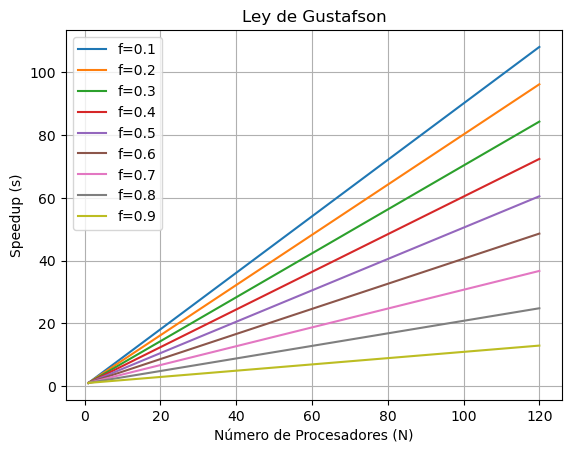

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Valores de N (número de procesadores) de 1 a 120
N = np.arange(1, 121)

# Valores de f (fracción secuencial) desde 0.1 hasta 0.9
f_values = np.linspace(0.1, 0.9, 9)

# Crear un gráfico para cada valor de f
for f in f_values:
    speedup = N - f * (N - 1)
    plt.plot(N, speedup, label=f'f={f:.1f}')

# Configurar el gráfico
plt.xlabel('Número de Procesadores (N)')
plt.ylabel('Speedup (s)')
plt.title('Ley de Gustafson')
plt.legend()
plt.grid()

# Mostrar el gráfico
plt.show()


### Ejercicio

Establezca el porcentaje de paralelización de un algoritmo que tiene:

* Aceleración = 2.3 X
* Procesadores = 12

Pista: Utilice la Ley de Amdahl

In [ ]:
### TU CÓDIGO VA AQUÍ
S=2.3
N=12
fs=(N-S)/(S*(N-1))
fp=1-fs
print("el procentaje de codigo paralelo es: ",fp*100)

### HASTA AQUÍ

el procentaje de codigo paralelo es:  61.6600790513834


### Ejercicio de Aceleraciones

In [ ]:
#@title Ejecute la siguente celda para importar los insumos del ejercicio
import time
t_secuencial = 60 #@param
t_paralelo = 5 #@param
t_exportdata = 3*60 #@param
def leerdata():
  time.sleep(1)

def asignarMemoria():
  time.sleep(1)

def copiarDatos():
  time.sleep(1)

def kernelSecuencial(t:int=t_secuencial):
  time.sleep(t)

def kernelParalelo(t:int=t_paralelo):
  time.sleep(t)

def exportarDatos(t:int=t_exportdata):
  time.sleep(t)

def liberarMemoria():
  time.sleep(1)


Un proceso a bajo nivel de paralelización de un proceso consta de varias etapas en el siguiente orden:

* Leer data en RAM de CPU
* Asignar memoria en la GPU
* Copiar datos de la RAM de CPU a RAM de GPU y cache
* Ejecución de la tarea (paralelo o serial)
* Exportar datos de la GPU a la CPU
* Liberar memoria


Simulemos un proceso secuencial y un programa paralelizado

para eso pueden usar las siguientes funciones:



```
* leerdata()
* asignarMemoria()
* copiarDatos()
* kernelSecuencial()
* kernelParalelo()
* exportarDatos()
* liberarMemoria()
```
Teniendo estas funciones, arme dos casos, un proceso secuencial y un proceso paralelizado; luego realice la medición de los "*breakdowns*" y tiempos de ejecución del kernel.

1. Calcule la aceleración del programa paralelizado respecto al secuencial.
2. Calcule la fracción de código paralelo y no paralelo con respecto al tiempo.
3. Analice el comportamiento de la aceleración de todo el programa o de solo la parte de kernel. ¿Vale la pena la paralelización?

4. Vaya al formulario y multiplique el "*t_exportdata*" por 60. Realice los pasos anteriores en otra celda, analice los cambios y concluya sobre los resultados





In [ ]:
### parte 1,2,3 - TU CÓDIGO VA ACÁ

inicio = time.time()
leerdata()
fin=time.time()
tiempoLeer=fin-inicio

inicio = time.time()
asignarMemoria()
fin=time.time()
tiempoAsignar=fin-inicio

inicio = time.time()
copiarDatos()
fin=time.time()
tiempoCopiar=fin-inicio

inicio = time.time()
kernelSecuencial()
fin=time.time()
tiempoKernelSecuencial=fin-inicio

inicio = time.time()
exportarDatos()
fin=time.time()
tiempoExportar=fin-inicio

inicio = time.time()
liberarMemoria()
fin=time.time()
tiempoLiberar=fin-inicio

totalSecuencial=tiempoLeer+tiempoAsignar+tiempoCopiar+tiempoKernelSecuencial+tiempoExportar+tiempoLiberar

print("el breakdown de tiempo es:")
print("leer data:",tiempoLeer)
print("asignar memoria:",tiempoAsignar)
print("copiar datos:",tiempoCopiar)
print("tiempo kernel secuencial:",tiempoKernelSecuencial)
print("tiempo exportar:",tiempoExportar)
print("tiempo liberar:",tiempoLiberar)
print("tiempo Total:",totalSecuencial)
### TU CÓDIGO TERMINA ACÁ

el breakdown de tiempo es:
leer data: 1.0013580322265625
asignar memoria: 1.0008609294891357
copiar datos: 1.0013360977172852
tiempo kernel secuencial: 60.05391883850098
tiempo exportar: 180.08205366134644
tiempo liberar: 1.0003104209899902
tiempo Total: 244.13983798027039


In [ ]:
### parte 1,2,3 - TU CÓDIGO VA ACÁ

inicio = time.time()
leerdata()
fin=time.time()
tiempoLeer=fin-inicio

inicio = time.time()
asignarMemoria()
fin=time.time()
tiempoAsignar=fin-inicio

inicio = time.time()
copiarDatos()
fin=time.time()
tiempoCopiar=fin-inicio

inicio = time.time()
kernelParalelo()
fin=time.time()
tiempoKernelParalelo=fin-inicio

inicio = time.time()
exportarDatos()
fin=time.time()
tiempoExportar=fin-inicio

inicio = time.time()
liberarMemoria()
fin=time.time()
tiempoLiberar=fin-inicio

totalParalelo=tiempoLeer+tiempoAsignar+tiempoCopiar+tiempoKernelParalelo+tiempoExportar+tiempoLiberar

print("el breakdown de tiempo es:")
print("leer data:",tiempoLeer)
print("asignar memoria:",tiempoAsignar)
print("copiar datos:",tiempoCopiar)
print("tiempo kernel paralelo:",tiempoKernelParalelo)
print("tiempo exportar:",tiempoExportar)
print("tiempo liberar:",tiempoLiberar)
print("tiempo Total:",totalParalelo)

### TU CÓDIGO TERMINA ACÁ

el breakdown de tiempo es:
leer data: 1.0013678073883057
asignar memoria: 1.001302719116211
copiar datos: 1.001378059387207
tiempo kernel paralelo: 5.005009174346924
tiempo exportar: 180.10010313987732
tiempo liberar: 1.001298189163208
tiempo Total: 189.11045908927917


In [ ]:
print("La aceleracion de todo el codigo paralelo vs secuencial es:",totalSecuencial/totalParalelo)
print("La fracción de codigo paralelo respecto al total:",tiempoKernelParalelo/totalParalelo)
print("La fracción de codigo No paralelo respecto al total:",1-tiempoKernelParalelo/totalParalelo)
print("La aceleracion de todo el codigo paralelo vs secuencial solo en el kernel es:",tiempoKernelSecuencial/tiempoKernelParalelo)

La aceleracion de todo el codigo paralelo vs secuencial es: 1.2909906683956163
La fracción de codigo paralelo respecto al total: 0.026466062207506226
La fracción de codigo No paralelo respecto al total: 0.9735339377924938
La aceleracion de todo el codigo paralelo vs secuencial solo en el kernel es: 11.998762988548783


In [ ]:
### parte 4 - TU CÓDIGO VA ACÁ



### TU CÓDIGO TERMINA ACÁ

### Ejercicio

Usted ha sido contratado en una empresa de tecnología, y encuentra poca documentación sobre la infraestructura del cluster. Para un proceso de renovación usted debe conocer  la precisión en punto flotante que tienen dos de sus computadores ya que debe dar de baja al de menor precisión. Solo tiene la siguiente información:

Computador 1:

* Vel_cpu = 3 GHz
* n_cpus = 128 cores
* operaciones x ciclo = 4
* TFlops = 49.152

Computador 2:

* Vel_cpu = 3.5 GHz
* n_cpus = 12 cores
* operaciones x ciclo = 2
* TFlops = 5.376

Computador 3:

* Vel_cpu = 2.5 GHz
* n_cpus = 128 cores
* operaciones x ciclo = 2
* TFlops = 40.96

Computador 4:

* Vel_cpu = 3.5 GHz
* n_cpus = 24 cores
* operaciones x ciclo = 4
* TFlops = 10.752

programe una función para definir el computador con la menor precisión y menor potencia

In [ ]:
### TU CÓDIGO VA AQUÍ

### HASTA AQUÍ

### Conversión de punto flotante a binario con precisión simple y doble.


Veamos un par de funciones usando librerias para la transformación de flotante a binario.

In [ ]:
## Conversión a binario en precisión simple.
import struct

def float_to_binary32(num):
    # Estructura IEEE 754 para float de 32 bits
    s = struct.pack('>f', num)
    # Convierte los 4 bytes a una secuencia binaria de 32 bits
    bits = ''.join(['{0:08b}'.format(b) for b in s])
    return bits


float_to_binary32(-3.6245)


'11000000011001111111011111001111'

In [ ]:
## Conversión a binario en precisión doble.
import struct

def float_to_binary64(num):
    # Estructura IEEE 754 para float de 64 bits
    s = struct.pack('>d', num)
    # Convierte los 8 bytes a una secuencia binaria de 64 bits
    bits = ''.join(['{0:08b}'.format(b) for b in s])
    return bits

float_to_binary64(-3.6245)

'1100000000001100111111101111100111011011001000101101000011100101'

### Ejercicio

Teniendo en cuenta el procedimiento visto en clase para convertir de punto flotante a binario, realice un script que implemente cada uno de los pasos a pedal, sin utilizar funciones como las vistas anteriormente.

In [ ]:
### TU CODIGO VA AQUÍ


### HASTA AQUÍ